In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Exploratory Data Analysis of the Titianic Dataset

In [1]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load the dataset

In [2]:
train = pd.read_csv('Vishal Mani - train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

### Attribute Information:-
Survived:- Survival 0 = No, 1 = Yes

Pclass:- Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

Sex:- Sex

Age:- Age in years

SibsSp:- Number of siblings / spouses aboard the Titanic

Parch Number:- of parents / children aboard the Titanic

Ticket:- Ticket number

Fare:- Passenger fare

Cabin:- Cabin number

Embarked:- Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

## Univariate EDA:

### What is the Count of Survived vs Not Survived?

In [4]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### It can be observed that out of 892 passengers in the dataset, 549 passengers did not survive and 342 passengers survived.

### Find out the Numerical Columns Basic Statistics:

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Some observations of the dataset.
1. Age group of passengers in the dataset ranges between a few months old to a maximum age of 80 years with an average age of approximately 80.
2. The minimum fare amount is 0 units and the maximum fare amount is 512 units.

### Visualize Survived vs Not Survived:

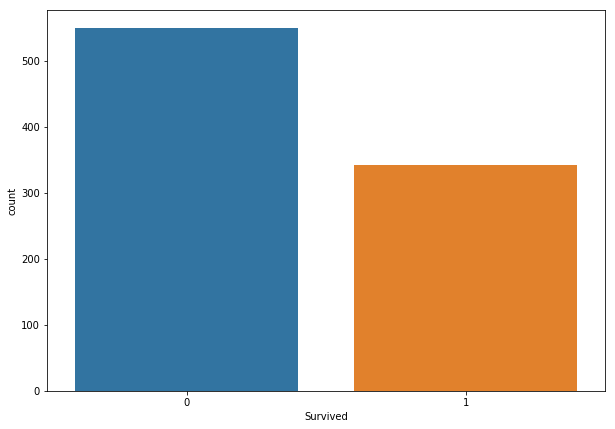

In [6]:
plt.figure(figsize=(10,7))
sns.countplot(train['Survived'])

#### The plot tells us that the number of people who did not survive is considerably more than that of the number of people who survived.

### Visual EDA for single Categorical Column: "Embarked"

In [7]:
train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [8]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

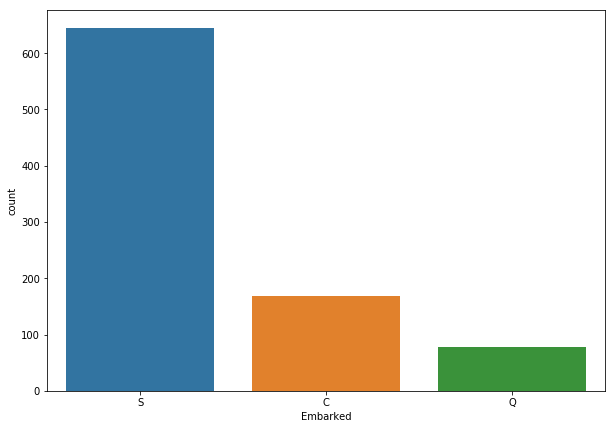

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(train['Embarked'])

#### It can be observed that most of the passengers fall under the S category and The Q category has the least number of passengers.

### Visual EDA for single Continuous Column: "Fare" using Distribution Plot

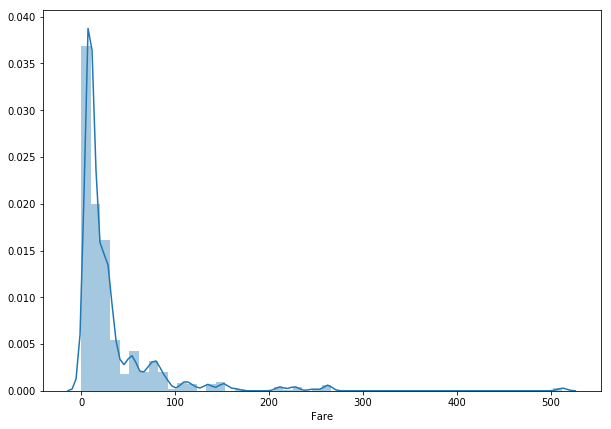

In [10]:
plt.figure(figsize=(10,7))
sns.distplot(train['Fare'])

#### Most of the Fares fall under 100 units of Price and the distribution of fares is right skewed. Meaning there are very few fares which are very expensive and cost more than 200 units,

### Visual EDA for single Continuous Column: "Fare" using KDE(Kernel Density Estimation) Plot

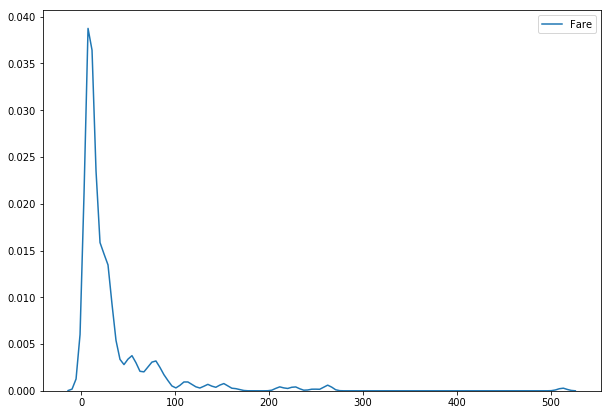

In [11]:
plt.figure(figsize=(10,7))
sns.kdeplot(train.Fare)

#### The density plot shows the probability densities for the prices of the all the tickets. The Regions between 0 to approximately 70 has the highest density, meaning most of the passengers are travelling on a fare which costs at most 70 units.

## Bivariate EDA:

###  What is the count of Males and Females Survived and Not Survived in each Class?

In [77]:
# g = sns.FacetGrid(data=train,col='Pclass',height=6)
# g.map(sns.countplot,"Sex",hue=train['Survived'],palette='Set2')
# plt.legend(train['Survived'],title='Survived')

In [76]:
for i in train['Pclass'].unique():
    print("Counts for Class "+str(i)+'\n')
    print(pd.crosstab(index=train[train['Pclass']==i]['Survived'],columns=train[train['Pclass']==i]['Sex']))

Counts for Class 3

Sex       female  male
Survived              
0             72   300
1             72    47
Counts for Class 1

Sex       female  male
Survived              
0              3    77
1             91    45
Counts for Class 2

Sex       female  male
Survived              
0              6    91
1             70    17


### Visualize Survived and Not Survived with respect to the 'Embarked' Column:

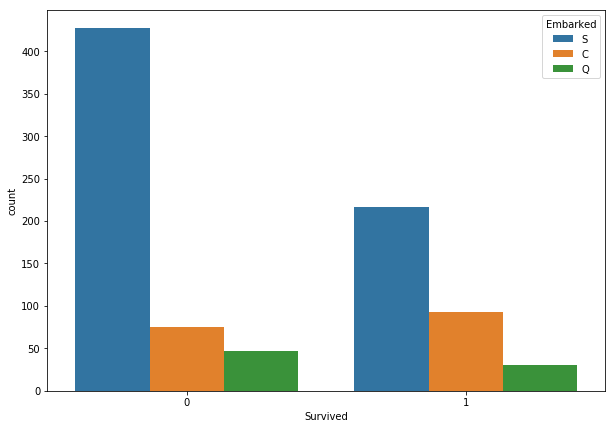

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(train['Survived'],hue=train['Embarked'])

#### It can be inferred that there are more number of people who have survived in Class C than the number of people of who have died. 

### Plot a Desnity Graph based on Fare and Survival Rate:

(-20, 200)

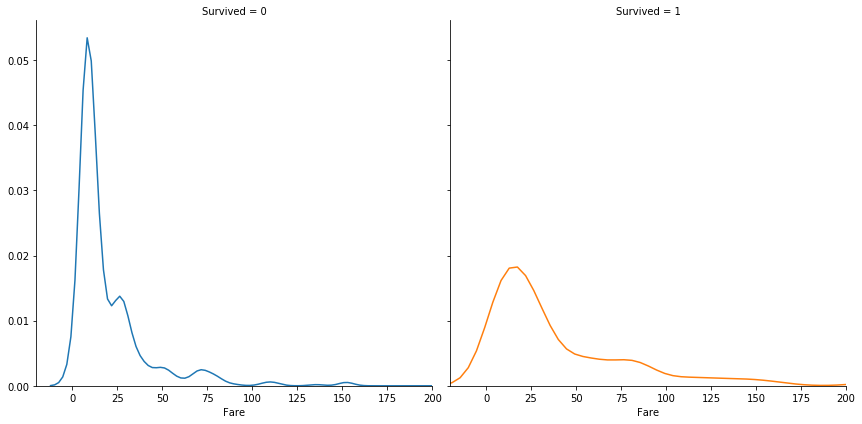

In [73]:
g = sns.FacetGrid(data=train,col='Survived',hue='Survived',height=6)
g.map(sns.kdeplot,'Fare')
plt.xlim(-20,200)

#### One thing that can be observed from the above graph is that the probability of survival for the fares greater than 50 is higher than the probability of not surviving.

### Plot a Distplot based on Fare and Survival Rate:

(-20, 200)

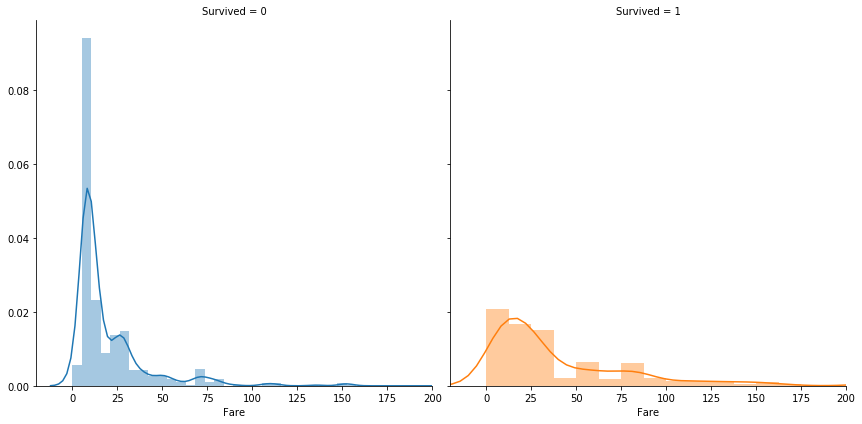

In [74]:
g = sns.FacetGrid(data=train,col='Survived',hue='Survived',height=6)
g.map(sns.distplot,'Fare')
plt.xlim(-20,200)

#### This distplot also suggests that the number of people who survived who survived travelling with fares greater than 50 is greater than the number of people who have not survived.

### How are "Age" and "Fare" Columns related? Plot a Graph for the same:

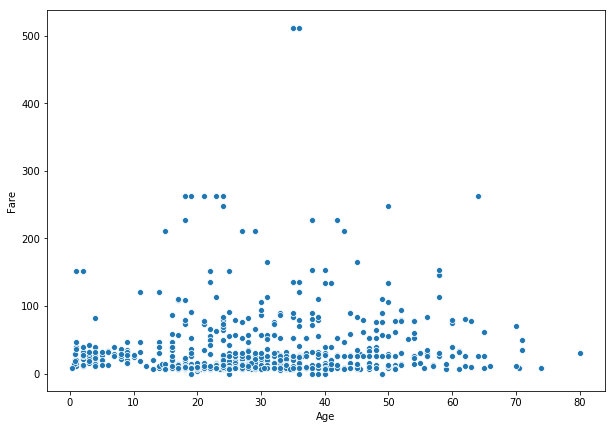

In [48]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Age',y='Fare',data=train)

#### We can see that majority of the travellers have ticket fares lesser than 50 and the age group of travellers who are travelling in expensive tickets mostly fall under the range of 20 to 50 years.This could be because of them working and thereby being able to travel in expensive tickets.

## Multivariate EDA 

### Does Age have an impact on Survival Rate for each Sex and Class group?

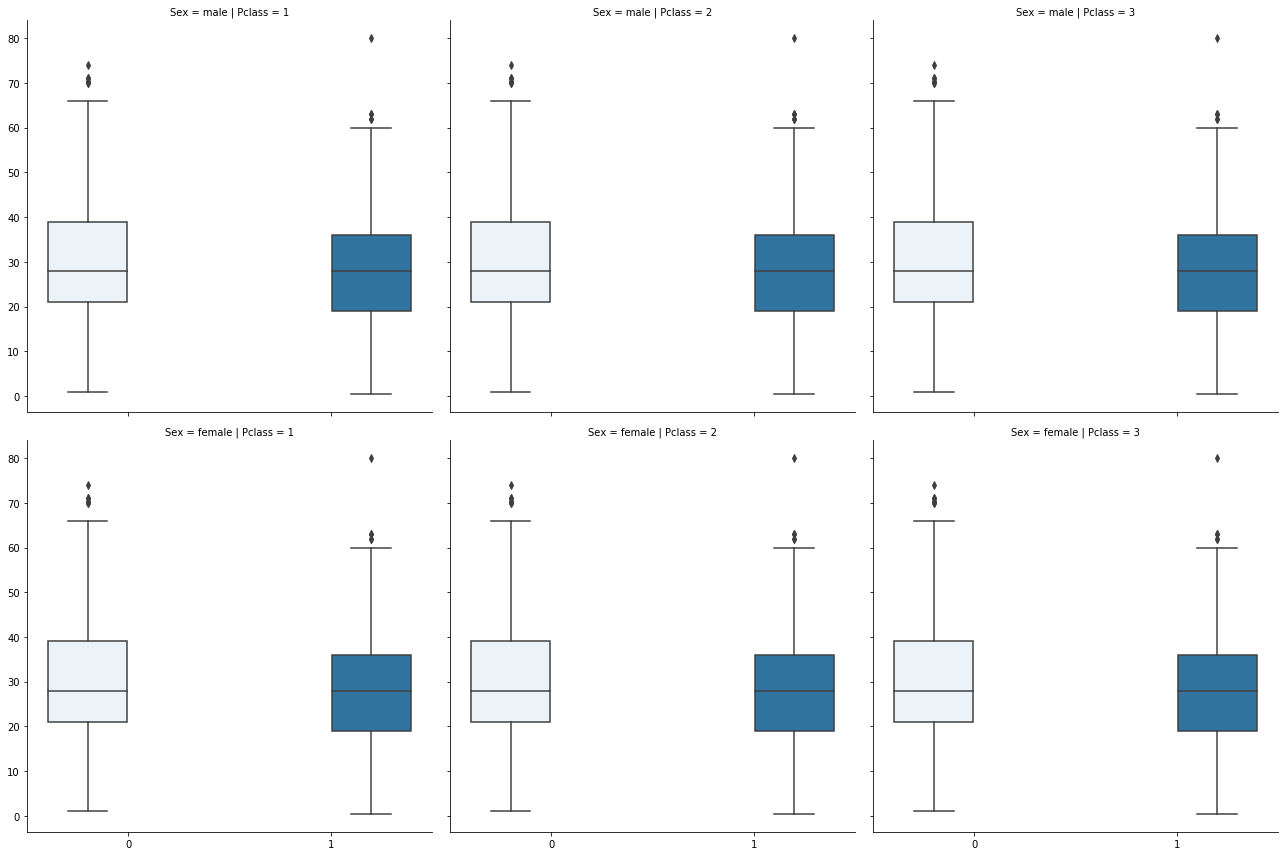

In [65]:
g = sns.FacetGrid(data=train,col='Pclass',height=6,row='Sex')
g.map(sns.boxplot,x='Survived',y='Age',data=train,hue='Survived')

#### We can see in general that for all the classes and genders the first and third quartiles of age of a passenger with respect to survived is lower than that of not survived. We can conclude that in general more younger passengers and children would have been on the priority to get saved first. Additionally we can see some outilers as well implying that there was effor to save older people also, although some of them couldn't make it.

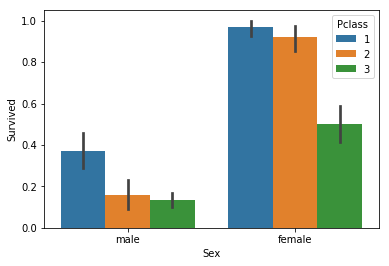

In [78]:
sns.barplot(train['Sex'], train['Survived'], train['Pclass'])

#### Additionally we can also see that the survival rate of females is higher than that of the males and class 1 had the highest number of survivors followed by class 2 and class 3.

## Plot a HEATMAP showing the correlations between different features:

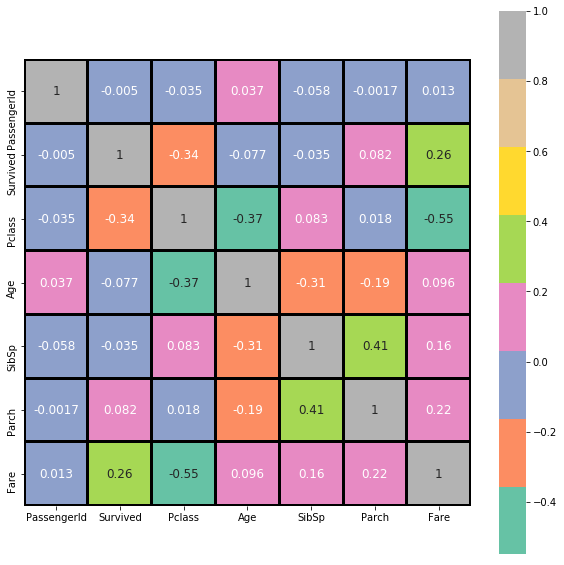

In [68]:
fig, axs = plt.subplots(nrows=1, figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, square=True, cmap='Set2', linewidths=2, linecolor='black', annot_kws={'size':12})

#### We can observe that correlation exists between survived and Fare amount and negative correlation exists between Pclass and Fare anount. Additonally age is negatively correlated with SibSP. Parch and Sibsp also have correlation between them.


## Conclusion

We can conclude that:
    1. Most of the passengers fall under the S category and The Q category has the least number of passengers.
    2. Most of the Fares fall under 100 units of Price.
    3. The number of people travelling in fares greater than 200 is very less.
    4. More number of people have survived in Class C than the number of people of who have died. Implying class C had the 
    highest survival rate.
    5. The probability of survival for the fares greater than 50 is higher than the probability of not surviving.
    6. Females have a higher survival rate than males. Gender plays an important role in a person's survival.
 
